<a href="https://colab.research.google.com/github/Elysiario/Python_Data_Mining/blob/main/Projeto_Big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importa as bibliotecas necessárias para o início do projeto SparkSession e col do módulo pyspark.sql fornecerão
# funcionalidades para criação de sessões Spark e operações de coluna em DataFrames, respectivamente.

!pip install pyspark

from pyspark.sql.functions import col
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=aa4fe447515745bf4add1f85ce5c5d6a18c8d3554b3f65694bc4c744adfdcddc
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Iniciar a sessão Spark
spark = SparkSession.builder.appName("Bigdata").getOrCreate()


# Caminhos dos arquivos CSV
train_path = '/content/drive/MyDrive/Colab Notebooks/Projeto_Big_data/train.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/Projeto_Big_data/test.csv'

# Carregar os CSVs para DataFrames Spark
df_train = spark.read.csv(train_path, header=True, inferSchema=True)
df_test = spark.read.csv(test_path, header=True, inferSchema=True)

# Combinar os DataFrames usando o método union
df = df_train.union(df_test)

# Exibir as primeiras linhas do DataFrame combinado
df.show()

+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+
|_c0|    id|Gender|    Customer Type|Age| Type of Travel|   Class|Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|        satisfaction|
+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+-

In [14]:
# Verificar tipos de colunas do dataset
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Type of Travel: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Inflight wifi service: integer (nullable = true)
 |-- Departure/Arrival time convenient: integer (nullable = true)
 |-- Ease of Online booking: integer (nullable = true)
 |-- Gate location: integer (nullable = true)
 |-- Food and drink: integer (nullable = true)
 |-- Online boarding: integer (nullable = true)
 |-- Seat comfort: integer (nullable = true)
 |-- Inflight entertainment: integer (nullable = true)
 |-- On-board service: integer (nullable = true)
 |-- Leg room service: integer (nullable = true)
 |-- Baggage handling: integer (nullable = true)
 |-- Checkin service: integer (nullable = true)
 |-- Inflight service: integer (nullable = true)
 |-- Cleanline

In [15]:
# Analisar as dimensões do dataset
num_linhas = df.count()
num_colunas = len(df.columns)
print(f"Número de linhas: {num_linhas}, Número de colunas: {num_colunas}")

Número de linhas: 129880, Número de colunas: 25


In [16]:
# Contagem de valores nulos por coluna
from pyspark.sql.functions import col, sum # A biblioteca útil para realizar operações matemáticas em DataFrames distribuídos no Apache Spark.

null_counts = df.agg(*[sum(col(c).isNull().cast("int")).alias(c + '_null_count') for c in df.columns])

# Exibir o resultado
null_counts.show()

+--------------+-------------+-----------------+------------------------+--------------+-------------------------+----------------+--------------------------+--------------------------------+--------------------------------------------+---------------------------------+------------------------+-------------------------+--------------------------+-----------------------+---------------------------------+---------------------------+---------------------------+---------------------------+--------------------------+---------------------------+----------------------+-------------------------------------+-----------------------------------+-----------------------+
|_c0_null_count|id_null_count|Gender_null_count|Customer Type_null_count|Age_null_count|Type of Travel_null_count|Class_null_count|Flight Distance_null_count|Inflight wifi service_null_count|Departure/Arrival time convenient_null_count|Ease of Online booking_null_count|Gate location_null_count|Food and drink_null_count|Online board

In [17]:
# Filtrar apenas as linhas com valores nulos na coluna "Arrival Delay in Minutes" Como o % de valores nulos é de 0,30% entende-se que não interferirá nos estudos
df_nulos_arrival_delay = df.filter(col("Arrival Delay in Minutes").isNull())

# Contar o número de valores nulos e o total de linhas
count_nulos = df_nulos_arrival_delay.count()
count_total = df.count()

# Calcular a porcentagem de valores nulos
porcentagem_nulos = (count_nulos / count_total) * 100

# Exibir as linhas resultantes
df_nulos_arrival_delay.show()

# Exibir a contagem e a porcentagem de valores nulos
print(f"Total de linhas com valores nulos: {count_nulos}")
print(f"Total de linhas no dataframe: {count_total}")
print(f"Porcentagem de valores nulos: {porcentagem_nulos:.2f}%")

+---+---+------+-------------+---+--------------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+------------+
|_c0| id|Gender|Customer Type|Age|Type of Travel|Class|Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|satisfaction|
+---+---+------+-------------+---+--------------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+------

+-------+------------------------+
|summary|Arrival Delay in Minutes|
+-------+------------------------+
|  count|                  129880|
|   mean|      15.045465044656606|
| stddev|       38.41635271637791|
|    min|                     0.0|
|    max|                  1584.0|
+-------+------------------------+



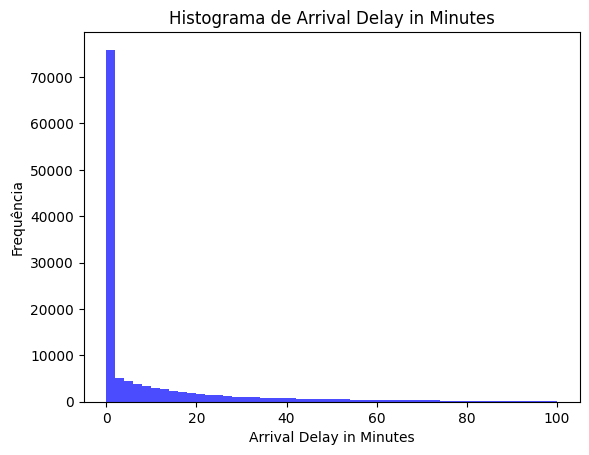

In [18]:
import matplotlib.pyplot as plt # Bibliioteca para a criação de gráficos

Arrival_Delay = "Arrival Delay in Minutes"

# Resumo estatístico e concentração de valores da coluna para apoio na decisão dos dados "null"
resumo_Arrival_Delay = df.select(Arrival_Delay).describe()

# Exibe o resumo estatístico
resumo_Arrival_Delay.show()

# Substitua os valores nulos por 0 na coluna "Arrival_Delay"
df = df.na.fill({Arrival_Delay: 0})

# Coleta os dados em uma lista usando collect()
hist_Arrival_Delay = df.select(Arrival_Delay).rdd.flatMap(lambda x: x).collect()

# Cria um histograma limitando o intervalo do eixo x entre 0 e 100
plt.hist(hist_Arrival_Delay, bins=50, range=(0, 100), color='blue', alpha=0.7)
plt.title(f'Histograma de {Arrival_Delay}')
plt.xlabel(Arrival_Delay)
plt.ylabel('Frequência')
plt.show()

# Devido ao altíssimo número de ocorrências=0 vamos usar este valor para substituir "null". a média nesse caso não faz sentido

In [19]:
# Substitua os valores nulos por 0 na coluna "Arrival Delay in Minutes"
df = df.fillna(0, subset=["Arrival Delay in Minutes"])

# Exiba diretamente a quantidade de valores nulos na coluna "Arrival Delay in Minutes"
print("Quantidade de valores nulos em 'Arrival Delay in Minutes':", df.filter(col("Arrival Delay in Minutes").isNull()).count())


Quantidade de valores nulos em 'Arrival Delay in Minutes': 0


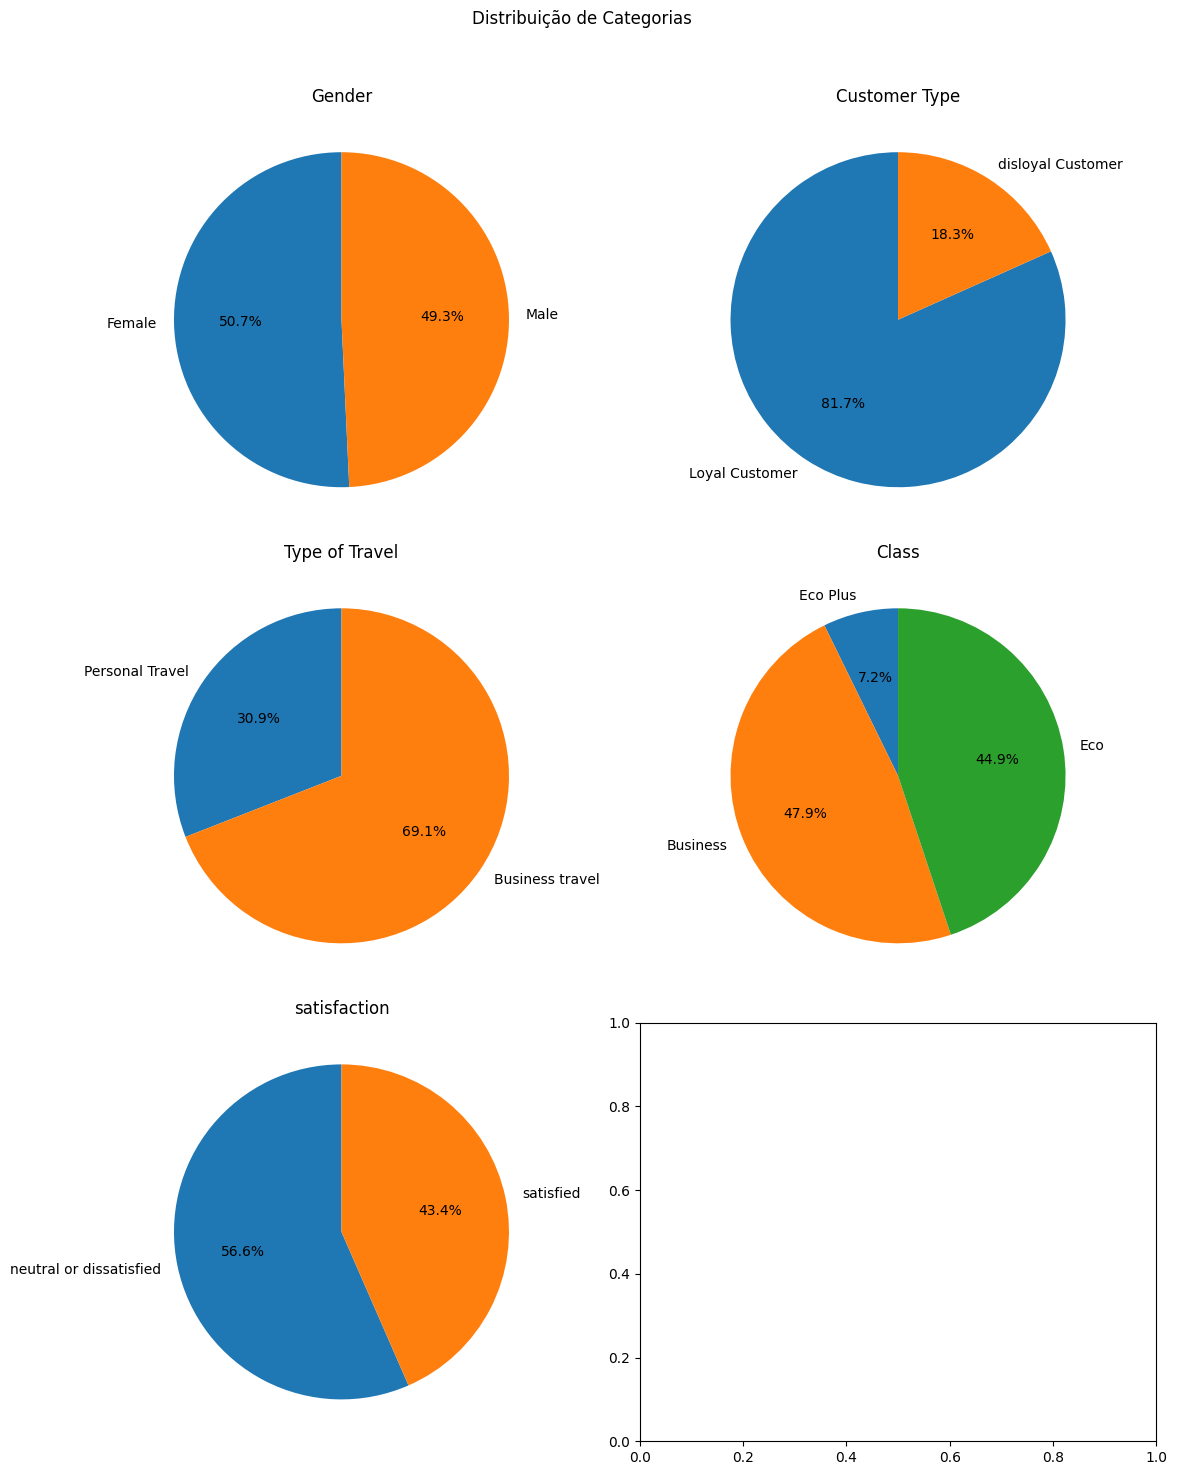

In [20]:
# Overview das colunas não numéricas

# Selecionar as colunas desejadas
selected_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
df_selected = df.select(selected_columns)

# Coletar dados para cada coluna
data = {col_name: df_selected.groupBy(col_name).count().collect() for col_name in selected_columns}

# Configurar o layout do subplot
fig, axs = plt.subplots(3, 2, figsize=(12, 15))
fig.suptitle('Distribuição de Categorias')

# Plotar gráficos de pizza para cada coluna
for i, col_name in enumerate(selected_columns):
    row = i // 2
    col = i % 2

    labels = [str(row[col_name]) for row in data[col_name]]
    counts = [row['count'] for row in data[col_name]]

    axs[row, col].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[row, col].set_title(col_name)

# Ajustar o layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Resumo Estatístico:
+-------+------------------+--------------------------+------------------------+------------------+
|summary|               Age|Departure Delay in Minutes|Arrival Delay in Minutes|   Flight Distance|
+-------+------------------+--------------------------+------------------------+------------------+
|  count|            129880|                    129880|                  129880|            129880|
|   mean| 39.42795657530028|        14.713712657838004|      15.045465044656606|1190.3163920542038|
| stddev|15.119359950371678|        38.071126215036514|       38.41635271637791| 997.4524773267644|
|    min|                 7|                         0|                     0.0|                31|
|    max|                85|                      1592|                  1584.0|              4983|
+-------+------------------+--------------------------+------------------------+------------------+



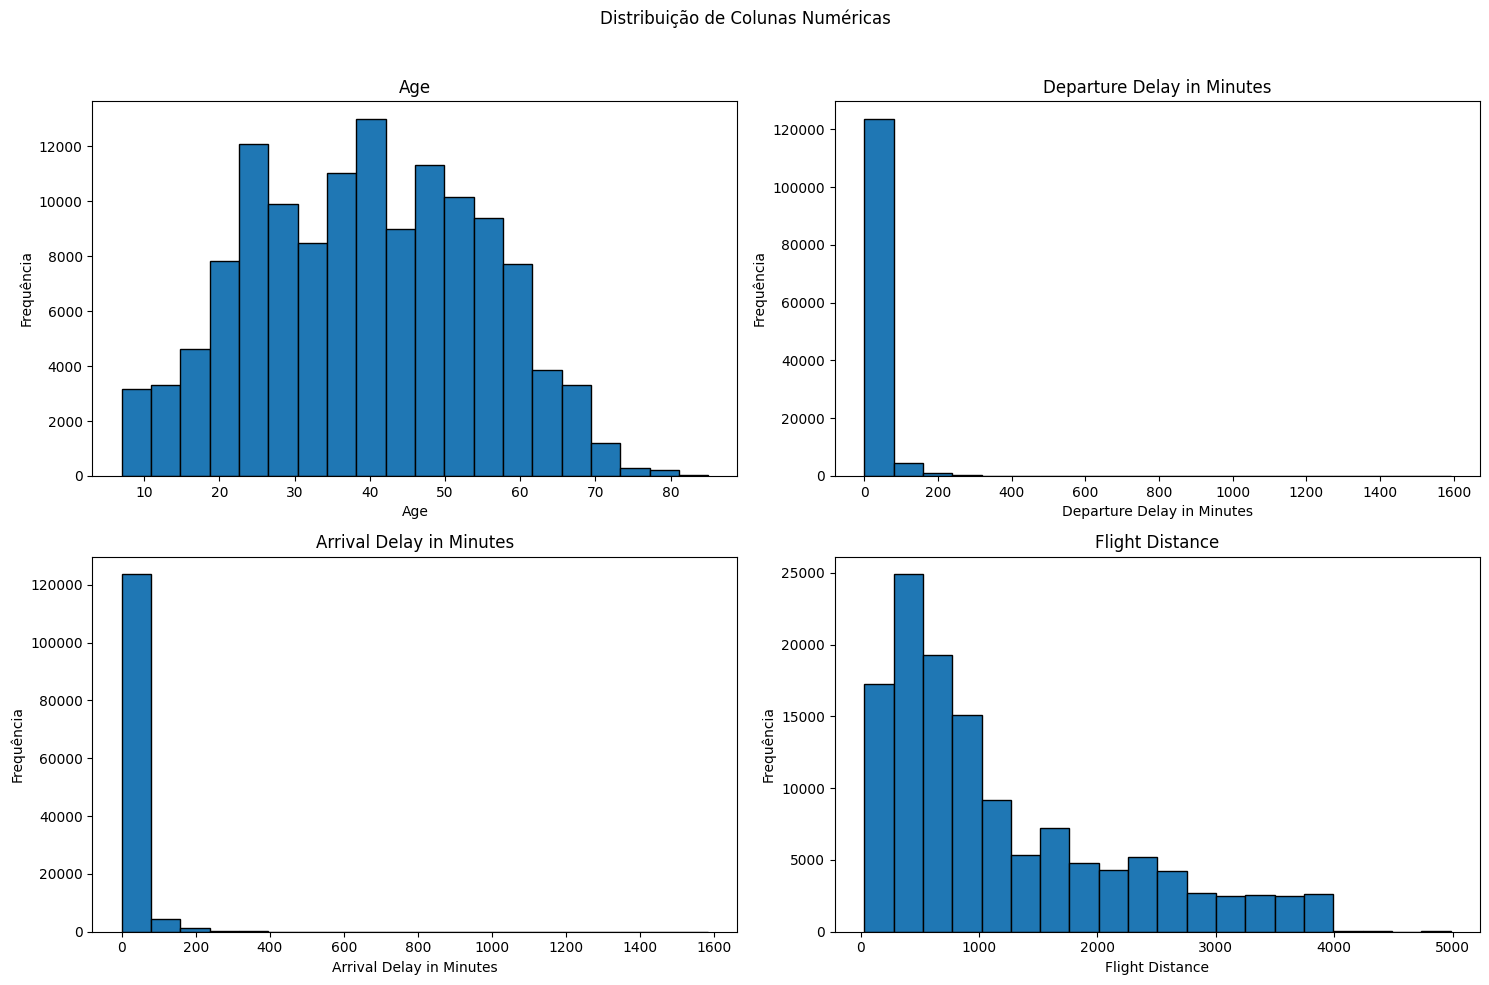

In [28]:
# Renomear 'int' para evitar conflitos
int_alias = int

# Selecionar as colunas numéricas desejadas, incluindo 'Flight Distance'
numeric_columns = ['Age', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance']
df_numeric = df.select(numeric_columns)

# Resumo estatístico
summary_stats = df_numeric.describe()

# Exibir resumo estatístico
print("Resumo Estatístico:")
summary_stats.show()

# Configurar o layout do subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuição de Colunas Numéricas')

# Plotar histogramas para cada coluna numérica
for i, col_name in enumerate(numeric_columns):
    histogram_data = df_numeric.select(col(col_name)).rdd.flatMap(lambda x: x).collect()
    axs[i // 2, i % 2].hist(histogram_data, bins=20, edgecolor='black')
    axs[i // 2, i % 2].set_title(col_name)
    axs[i // 2, i % 2].set_xlabel(col_name)
    axs[i // 2, i % 2].set_ylabel('Frequência')

# Ajustar o layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


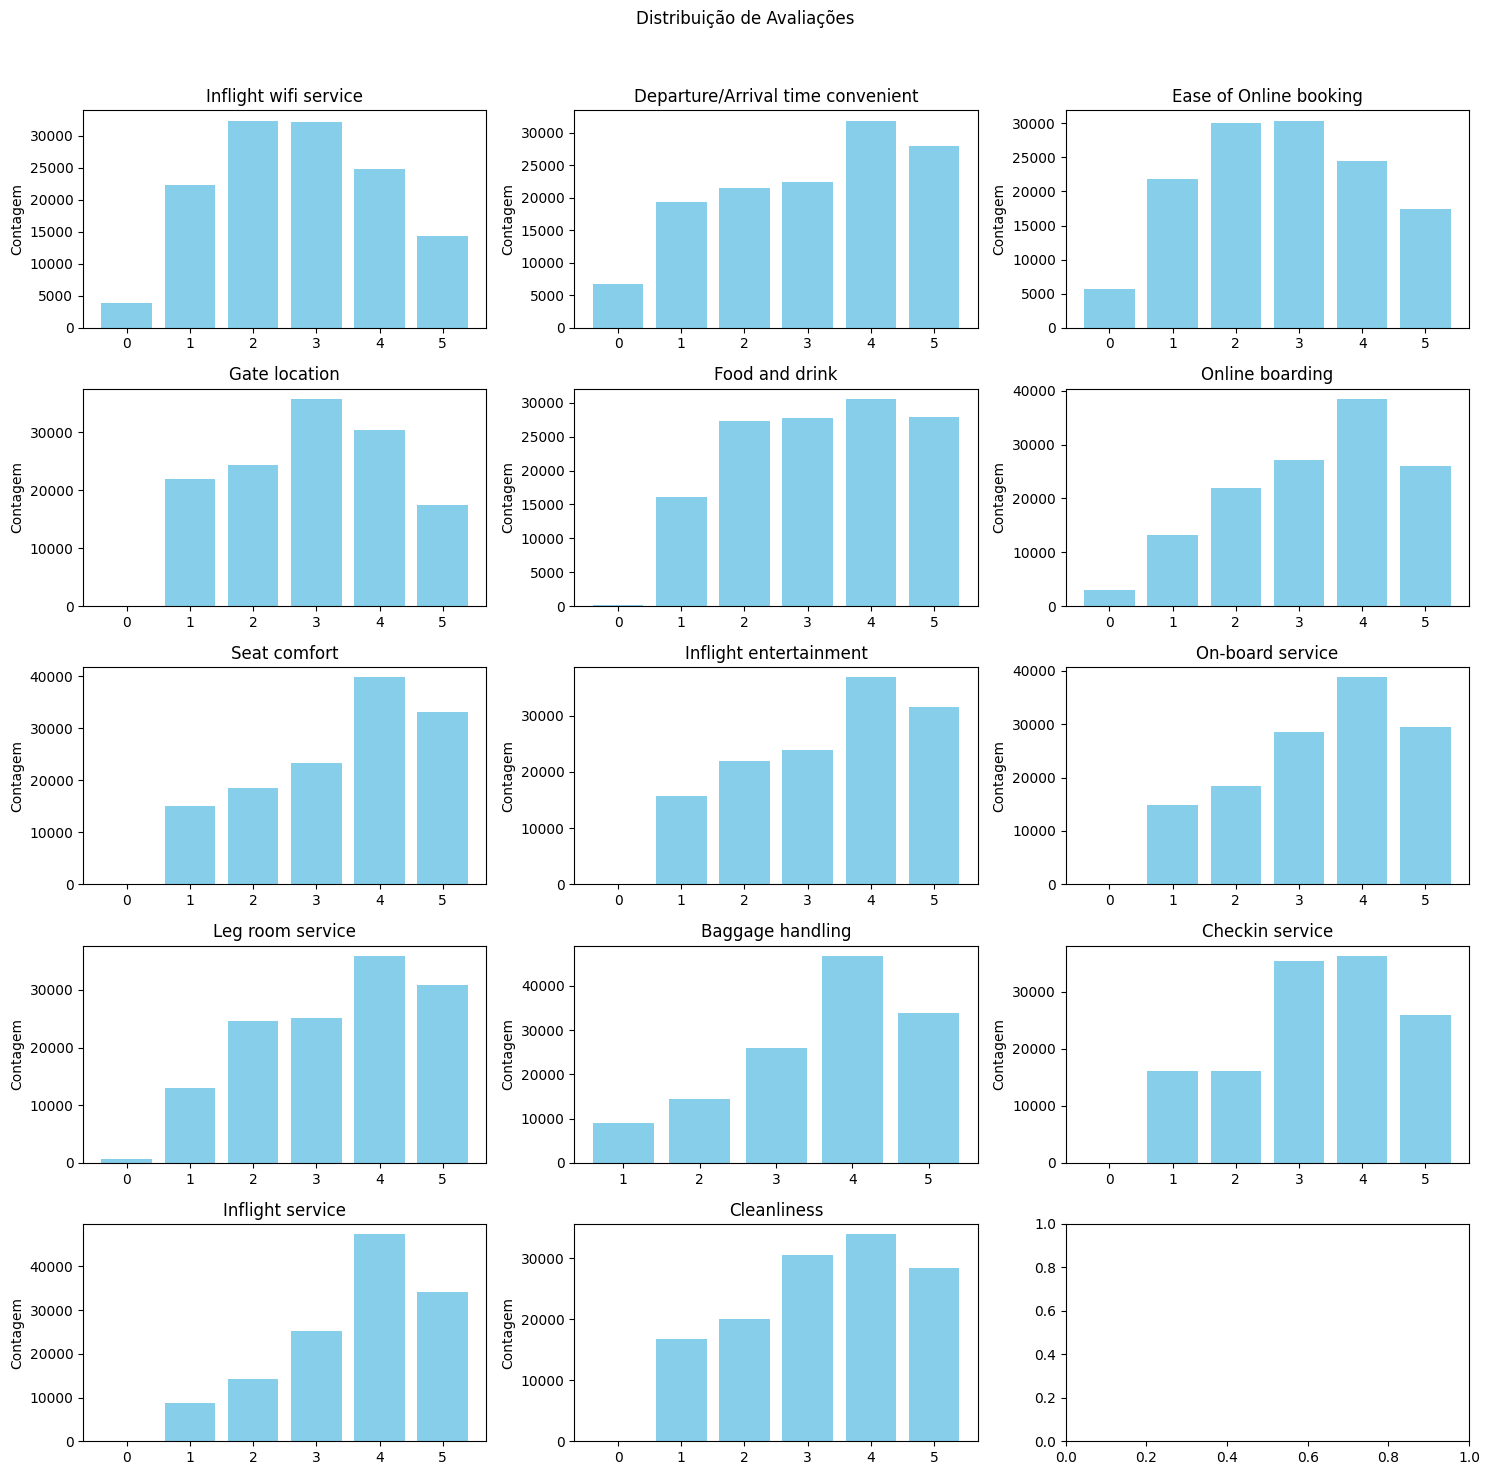

In [32]:
# Selecionar as colunas de avaliação
avaliacao_columns = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]

df_avaliacao = df.select(avaliacao_columns)

# Coletar dados para cada coluna de avaliação
data = {col_name: df_avaliacao.groupBy(col_name).count().orderBy(col_name).collect() for col_name in avaliacao_columns}

# Configurar o layout do subplot
fig, axs = plt.subplots(5, 3, figsize=(15, 15))
fig.suptitle('Distribuição de Avaliações')

# Plotar gráficos de barras empilhadas para cada coluna de avaliação
for i, col_name in enumerate(avaliacao_columns):
    counts = [row['count'] for row in data[col_name]]
    labels = [str(row[col_name]) for row in data[col_name]]

    row = i // 3
    col = i % 3

    axs[row, col].bar(labels, counts, color='skyblue')
    axs[row, col].set_title(col_name)
    axs[row, col].set_ylabel('Contagem')

# Ajustar o layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [33]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Selecionar colunas numéricas e de avaliação
colunas_selecionadas = [
    'Age', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance',
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]

df_selecionado = df.select(colunas_selecionadas)

# Converter DataFrame PySpark para DataFrame Pandas
df_pandas = df_selecionado.toPandas()

# Criar a matriz de correlação
matriz_correlacao = df_pandas.corr()

# Exibir a matriz de correlação
print("Matriz de Correlação:")
print(matriz_correlacao)


Matriz de Correlação:
                                        Age  Departure Delay in Minutes  \
Age                                1.000000                   -0.009041   
Departure Delay in Minutes        -0.009041                    1.000000   
Arrival Delay in Minutes          -0.011206                    0.959382   
Flight Distance                    0.099459                    0.002402   
Inflight wifi service              0.016116                   -0.015946   
Departure/Arrival time convenient  0.036960                    0.000778   
Ease of Online booking             0.022565                   -0.005318   
Gate location                     -0.000398                    0.005973   
Food and drink                     0.023194                   -0.029164   
Online boarding                    0.207572                   -0.019404   
Seat comfort                       0.159136                   -0.027999   
Inflight entertainment             0.074947                   -0.027012   
On-

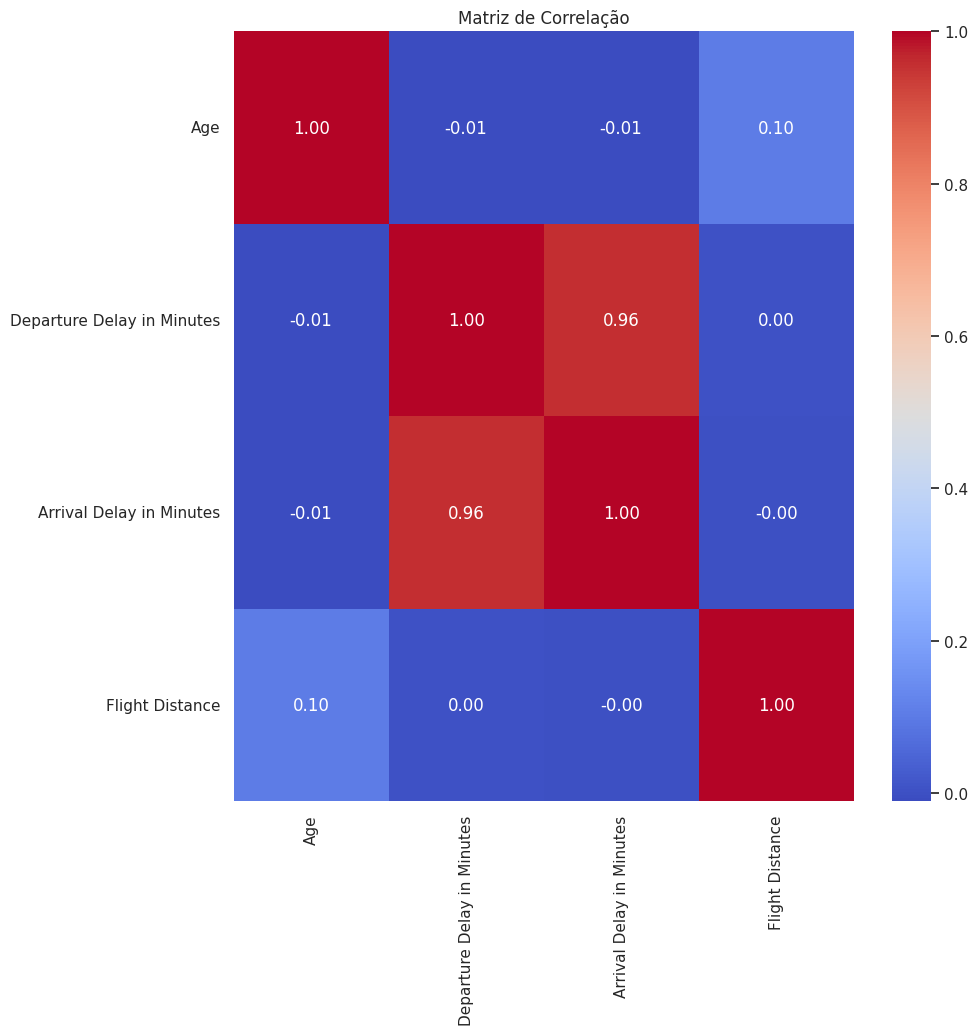

In [38]:
import numpy as np
import seaborn as sns
from pyspark.ml.feature import VectorAssembler

# Selecionar apenas colunas numéricas
colunas_numericas = [
    'Age', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance'
]

df_numeric = df.select(colunas_numericas)

# Criar um vetor para as colunas numéricas
vector_assembler = VectorAssembler(inputCols=colunas_numericas, outputCol="features")
df_assembled = vector_assembler.transform(df_numeric).select("features")

# Coletar os dados e converter para um array numpy
data_array = np.array(df_assembled.rdd.map(lambda row: row.features.toArray()).collect())

# Calcular a matriz de correlação com numpy
matriz_correlacao = np.corrcoef(data_array, rowvar=False)

# Criar um mapa de calor com seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=colunas_numericas, yticklabels=colunas_numericas)
plt.title("Matriz de Correlação")
plt.show()



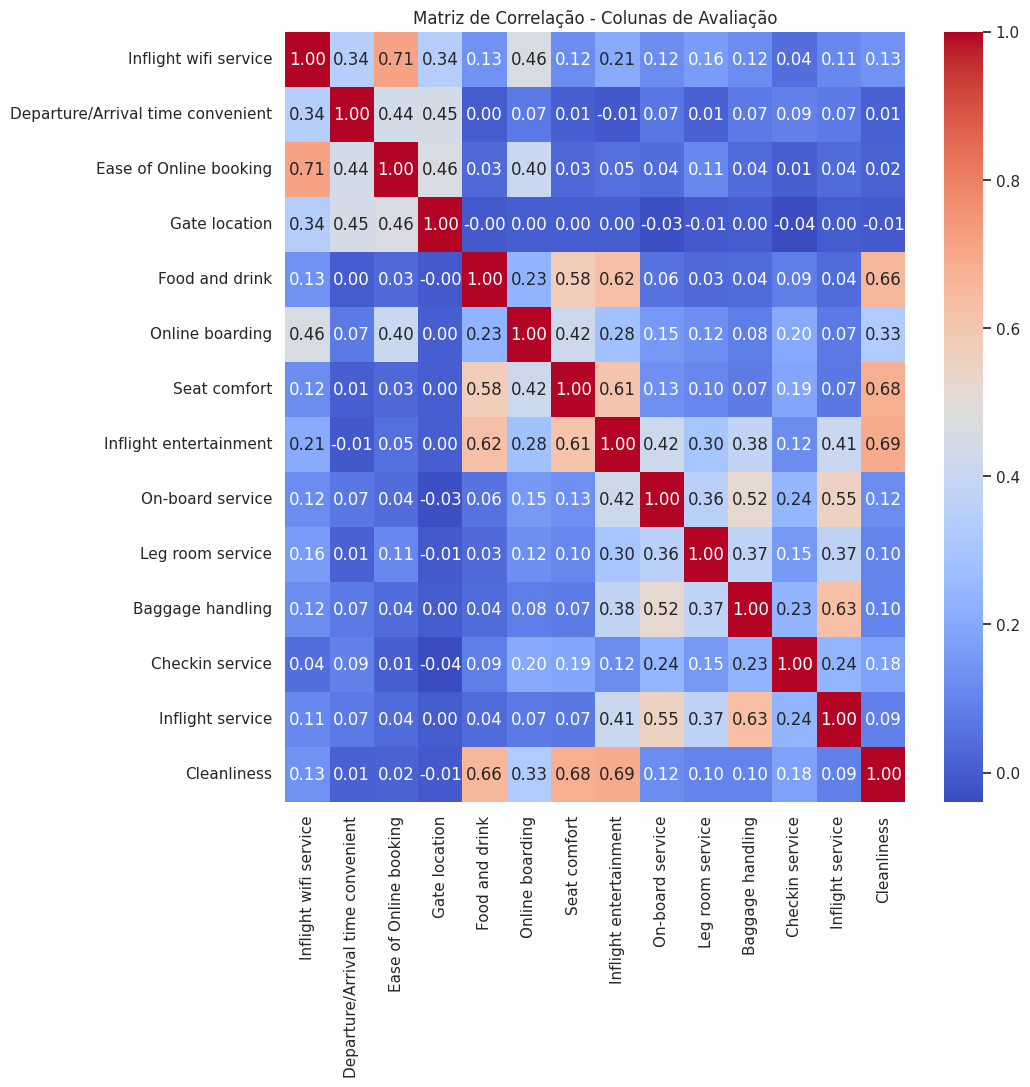

In [39]:
# Selecionar apenas colunas de avaliação
colunas_avaliacao = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]

df_avaliacao = df.select(colunas_avaliacao)

# Criar um vetor para as colunas de avaliação
vector_assembler = VectorAssembler(inputCols=colunas_avaliacao, outputCol="features")
df_assembled_avaliacao = vector_assembler.transform(df_avaliacao).select("features")

# Coletar os dados e converter para um array numpy
data_array_avaliacao = np.array(df_assembled_avaliacao.rdd.map(lambda row: row.features.toArray()).collect())

# Calcular a matriz de correlação com numpy
matriz_correlacao_avaliacao = np.corrcoef(data_array_avaliacao, rowvar=False)

# Criar um mapa de calor com seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.heatmap(matriz_correlacao_avaliacao, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=colunas_avaliacao, yticklabels=colunas_avaliacao)
plt.title("Matriz de Correlação - Colunas de Avaliação")
plt.show()

Correlações Irrelevantes:
         level_0                            level_1         0
0            Age         Departure Delay in Minutes -0.009041
2            Age                    Flight Distance  0.099459
4            Age  Departure/Arrival time convenient  0.036960
6            Age                      Gate location -0.000398
8            Age                    Online boarding  0.207572
..           ...                                ...       ...
274  Cleanliness              Inflight wifi service  0.131300
276  Cleanliness             Ease of Online booking  0.015125
278  Cleanliness                    Online boarding  0.329377
280  Cleanliness                   Leg room service  0.096695
282  Cleanliness                    Checkin service  0.176658

[142 rows x 3 columns]

Correlações Pouco Relevantes:
            level_0           level_1         0
0    Food and drink      Seat comfort  0.575846
2  On-board service  Baggage handling  0.520296
4  Baggage handling  On-board s

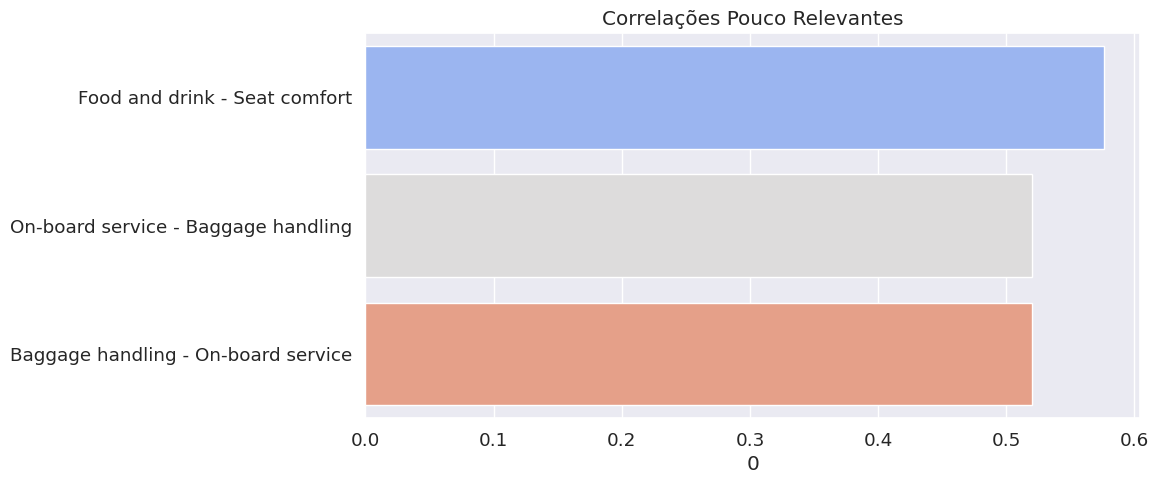

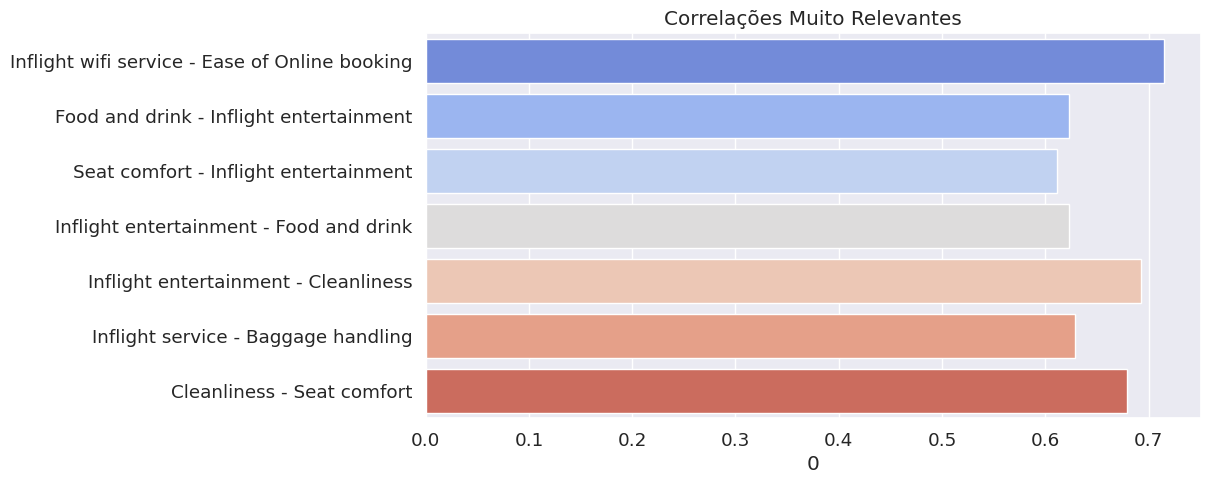

In [45]:
import numpy as np # Biblioteca usada para criar e manipular arrays

from pyspark.ml.feature import VectorAssembler # Usado para criar um vetor que contém as colunas numéricas e de avaliação selecionadas do DataFrame do Spark (df).

# Selecionar colunas numéricas e de avaliação
colunas_numericas = [
    'Age', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance'
]

colunas_avaliacao = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]

df_selecionado = df.select(colunas_numericas + colunas_avaliacao)

# Criar um vetor para as colunas numéricas e de avaliação
vector_assembler = VectorAssembler(inputCols=colunas_numericas + colunas_avaliacao, outputCol="features")
df_assembled = vector_assembler.transform(df_selecionado).select("features")

# Coletar os dados e converter para um array numpy
data_array = np.array(df_assembled.rdd.map(lambda row: row.features.toArray()).collect())

# Calcular a matriz de correlação com numpy
matriz_correlacao = np.corrcoef(data_array, rowvar=False)

# Criar um DataFrame Pandas para facilitar a análise
df_correlacao = pd.DataFrame(matriz_correlacao, columns=colunas_numericas + colunas_avaliacao, index=colunas_numericas + colunas_avaliacao)

# Dividir as correlações em grupos
irrelevante = df_correlacao[(df_correlacao <= 0.5) & (df_correlacao >= -1)].stack().reset_index()
pouco_relevante = df_correlacao[(df_correlacao > 0.5) & (df_correlacao <= 0.6)].stack().reset_index()
muito_relevante = df_correlacao[(df_correlacao > 0.6) & (df_correlacao < 0.9)].stack().reset_index()

# Selecionar apenas as linhas pares
irrelevante_pares = irrelevante[irrelevante.index % 2 == 0]

# Exibir as correlações irrelevantes
print("Correlações Irrelevantes:")
print(irrelevante_pares)

# Selecionar apenas as linhas pares
pouco_relevante_pares = pouco_relevante[pouco_relevante.index % 2 == 0]
muito_relevante_pares = muito_relevante[muito_relevante.index % 2 == 0]

# Exibir as correlações pouco relevantes
print("\nCorrelações Pouco Relevantes:")
print(pouco_relevante_pares)

# Exibir as correlações muito relevantes
print("\nCorrelações Muito Relevantes:")
print(muito_relevante_pares)

# Criar gráficos de barras para representar as correlações pouco relevantes e muito relevantes
def plot_correlacoes(correlacoes, titulo):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=correlacoes[0], y=correlacoes['level_0'] + ' - ' + correlacoes['level_1'], palette='coolwarm')
    plt.title(titulo)
    plt.show()

plot_correlacoes(pouco_relevante_pares, "Correlações Pouco Relevantes")
plot_correlacoes(muito_relevante_pares, "Correlações Muito Relevantes")



# Preparação dos dados

In [ ]:
sns.boxplot(x=df['coluna1'])
plt.title('Box Plot de coluna1')
plt.show()




In [ ]:
#Contagem Distinta de Valores em uma Coluna:
df.groupBy('coluna1').count().show()


In [ ]:
# Gráfico de Barras para Valores Únicos

result = df.groupBy('coluna1').count().toPandas()
result.plot(kind='bar', x='coluna1', y='count', legend=False)
plt.title('Contagem de Valores Únicos em coluna1')
plt.show()


In [ ]:
# Busca de outliers
coluna_outliers = 'coluna3'
sns.boxplot(x=df[coluna_outliers])
plt.title(f'Box Plot para Detecção de Outliers em {coluna_outliers}')
plt.show()

In [ ]:
# Encontrar o Ponto de Cotovelo (Elbow)
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt

# Supondo que você tenha um DataFrame df com as colunas que deseja usar para a análise de clusters

# Selecionar as colunas relevantes e criar um vetor de features
feature_cols = ['coluna1', 'coluna2', 'coluna3']
vec_assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
df_features = vec_assembler.transform(df)

# Calcular a inércia para diferentes valores de k
ks = range(2, 11)
inertias = []

for k in ks:
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(df_features)
    inertias.append(model.summary.trainingCost)

# Plotar a curva de cotovelo
plt.plot(ks, inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Encontrar o Número Ideal de Clusters')
plt.show()


In [ ]:
# Análise de Clusters usando K-means
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator

# Supondo que você tenha um DataFrame df com as colunas que deseja usar para a análise de clusters

# Selecionar as colunas relevantes e criar um vetor de features
feature_cols = ['coluna1', 'coluna2', 'coluna3']
vec_assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
df_features = vec_assembler.transform(df)

# Treinar o modelo K-means
kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(df_features)

# Adicionar as predições ao DataFrame original
df_clustered = model.transform(df_features)

# Avaliar a qualidade do clustering
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(df_clustered)
print(f'Silhouette Score: {silhouette}')

# Exibir os resultados
df_clustered.select('coluna1', 'coluna2', 'coluna3', 'prediction').show()
